In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import fpfs
import galsim
import numpy as np
import matplotlib.pylab as plt

In [2]:
class LensTransform1(object):
    def __init__(self, gamma1, gamma2, kappa):
        """Initialize the transform object of 2D grids
        Args:
            gamma1 (float):     the first component of lensing shear field
            gamma2 (float):     the second component of lensing shear field
            kappa (float):      the lensing convergence field
        """
        self.s2l_mat = np.array(
            [
                [1 - kappa - gamma1, -gamma2], 
                [-gamma2, 1 - kappa + gamma1]
            ]
        )
        return
    
    def transform(self, coords):
        """transform the center of pixels from lensed plane to pre-lensed plane
        Args:
            coords:   coordinates (x, y) of the pixel centers [arcsec]
        """
        return self.s2l_mat @ coords

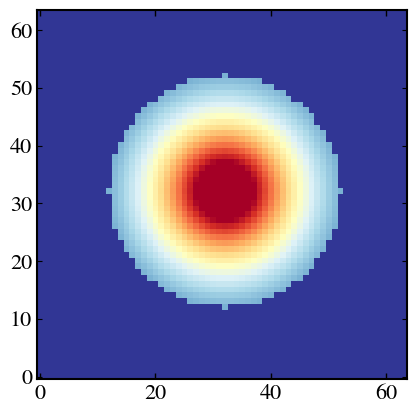

In [10]:
flux = 40
scale = 0.2
nn = 64
sersic_gal = galsim.Sersic(n=1.5, half_light_radius=1.5, flux=flux, trunc=4)
stamp = fpfs.simutil.Stamp(nn=nn, scale=scale)
gal_array = stamp.sample_galaxy(sersic_gal)
plt.close()
fpfs.pltutil.make_plot_image(gal_array)

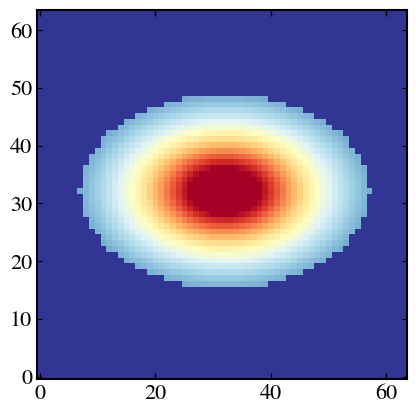

In [11]:
kappa = 0.0
gamma1 = 0.2
gamma2 = 0.0
lens = LensTransform1(gamma1=gamma1, gamma2=gamma2, kappa=kappa)

stamp = fpfs.simutil.Stamp(nn=nn, scale=scale)
stamp.transform_grids(lens)
gal_array2 = stamp.sample_galaxy(sersic_gal)
plt.close()
fpfs.pltutil.make_plot_image(gal_array2)

In [22]:
kappa = 0.0
gamma1 = 0.02
gamma2 = 0.0
lens = LensTransform1(gamma1=gamma1, gamma2=gamma2, kappa=kappa)
stamp = fpfs.simutil.Stamp(nn=64, scale=scale)
stamp.transform_grids(lens)
gal_array3 = stamp.sample_galaxy(sersic_gal)
psf_array = np.zeros(stamp.shape)
psf_array[nn // 2, nn // 2] = 1

coords = np.array([nn//2, nn//2])
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.52)
mms =  fpTask.measure(gal_array3, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=20)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("input shear: %.5f" % gamma1)
print("measured shear: %.5f" % shear)

2023/09/01 15:06:27 ---  Order of the shear estimator: nnord=4
2023/09/01 15:06:27 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/09/01 15:06:27 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec


input shear: 0.02000
measured shear: 0.02003
